# Time Series Forecasting

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv('all_airlines_all_airports.csv')

In [7]:
df.head()

,Date,ASM_Domestic,ASM_International,Flights_Domestic,Flights_International,Passengers_Domestic,Passengers_International,RPM_Domestic,RPM_International
0,2002-10-01,57725785,43289662,815489,92565,48054917,9578435,39181901,31535229
1,2002-11-01,54732773,40791272,766775,91342,44850246,9016535,36462419,28497161
2,2002-12-01,56993203,43261782,782175,96881,49684353,10038794,41534214,31761398
3,2003-01-01,56459559,42858438,785651,98053,43032450,9726436,36358651,31073669
4,2003-02-01,50293226,37223024,690750,85965,41166780,8283372,34247719,25641421


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      174 non-null    object
 1   ASM_Domestic              174 non-null    int64 
 2   ASM_International         174 non-null    int64 
 3   Flights_Domestic          174 non-null    int64 
 4   Flights_International     174 non-null    int64 
 5   Passengers_Domestic       174 non-null    int64 
 6   Passengers_International  174 non-null    int64 
 7   RPM_Domestic              174 non-null    int64 
 8   RPM_International         174 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 12.4+ KB


In [9]:
df.describe()

,ASM_Domestic,ASM_International,Flights_Domestic,Flights_International,Passengers_Domestic,Passengers_International,RPM_Domestic,RPM_International
count,1.740000e+02,1.740000e+02,174.000000,174.000000,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02
mean,5.934979e+07,5.522680e+07,746737.459770,110988.643678,5.415329e+07,1.356835e+07,4.781211e+07,4.391930e+07
std,4.300903e+06,9.840444e+06,70998.239177,11124.388670,5.308818e+06,2.587707e+06,5.545424e+06,9.360987e+06
min,4.800594e+07,3.722302e+07,570076.000000,85965.000000,4.116678e+07,8.283372e+06,3.424772e+07,2.492886e+07
25%,5.640924e+07,4.875751e+07,694986.000000,103315.750000,5.024728e+07,1.176969e+07,4.393475e+07,3.766125e+07
50%,5.966098e+07,5.345515e+07,740968.500000,110569.000000,5.413580e+07,1.321384e+07,4.734903e+07,4.267256e+07
75%,6.254960e+07,6.067220e+07,804790.250000,117756.250000,5.819323e+07,1.528553e+07,5.206172e+07,4.959666e+07
max,7.157587e+07,8.335816e+07,891350.000000,141554.000000,6.612997e+07,2.142620e+07,6.239184e+07,7.157168e+07


In [35]:
df_dom=df[['Date','Passengers_Domestic']]

In [36]:
df_dom.head()

,Date,Passengers_Domestic
0,2002-10-01,48054917
1,2002-11-01,44850246
2,2002-12-01,49684353
3,2003-01-01,43032450
4,2003-02-01,41166780


In [15]:
df_int=df[['Date','Passengers_International']]

In [16]:
df_int.head()

,Date,Passengers_International
0,2002-10-01,9578435
1,2002-11-01,9016535
2,2002-12-01,10038794
3,2003-01-01,9726436
4,2003-02-01,8283372


In [37]:
df_dom['Date']=pd.to_datetime(df_dom['Date'])

<ipython-input-37-ea4f342276ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dom['Date']=pd.to_datetime(df_dom['Date'])


In [38]:
df_dom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 174 non-null    datetime64[ns]
 1   Passengers_Domestic  174 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [39]:
df_dom.columns=['Date','Passengers']

In [41]:
df_dom.set_index('Date',inplace=True)

In [42]:
df_dom.head()

,Passengers
Date,
2002-10-01,48054917
2002-11-01,44850246
2002-12-01,49684353
2003-01-01,43032450
2003-02-01,41166780


In [44]:
import seaborn as sns

<AxesSubplot:xlabel='Passengers', ylabel='Count'>

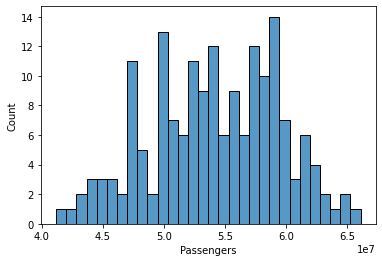

In [47]:
sns.histplot(df_dom['Passengers'],bins=30)

Text(0, 0.5, 'Passengers')

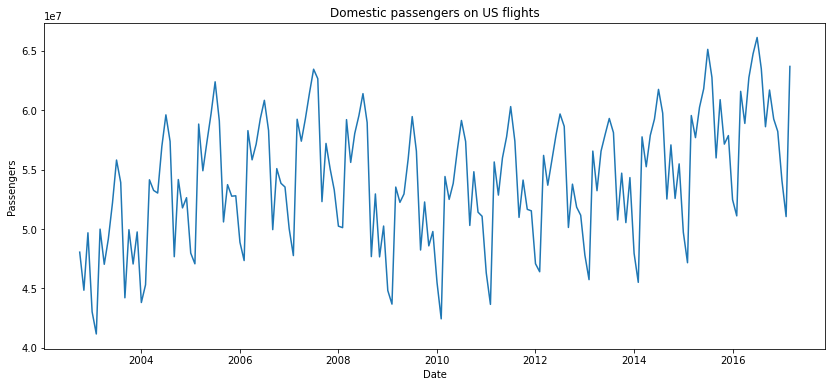

In [66]:
plt.figure(figsize=(14,6))
plt.plot(df_dom)
plt.title('Domestic passengers on US flights')
plt.xlabel('Date')
plt.ylabel('Passengers')

Check for stationarity

1. Rolling Means and Standard Deviation

In [67]:
df_dom_rol_mean=df_dom.rolling(12).mean()
df_dom_rol_std=df_dom.rolling(12).std()

In [71]:
df_dom_rol_mean.dropna(inplace=True)
df_dom_rol_std.dropna(inplace=True)

In [73]:
 np.count_nonzero(df_dom_rol_mean.isnull())  

0

Text(0, 0.5, 'Passengers')

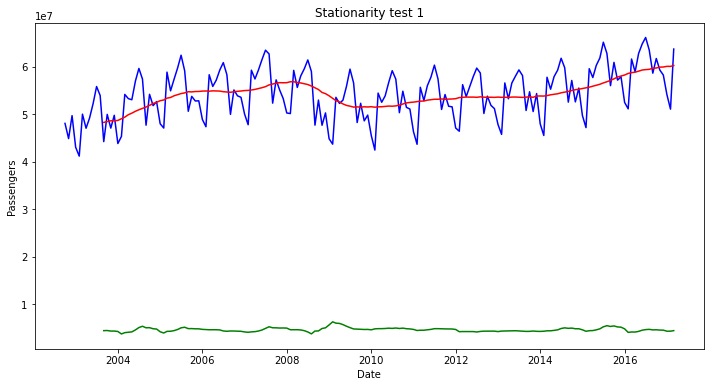

In [84]:
plt.figure(figsize=(12,6))
plt.plot(df_dom,color='blue',label='Original')
plt.plot(df_dom_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

2. ADF test

In [75]:
from statsmodels.tsa.stattools import adfuller

In [76]:
adf_result=adfuller(df_dom)

In [83]:
print("p-value: ",adf_result[1])
print("Test statistic: ",adf_result[0])
print("Critical values: ",adf_result[4])

p-value:  0.23818542308568952
Test statistic:  -2.115859494108299
Critical values:  {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


Perform Transformations

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [86]:
df_dom_decompose=seasonal_decompose(df_dom)

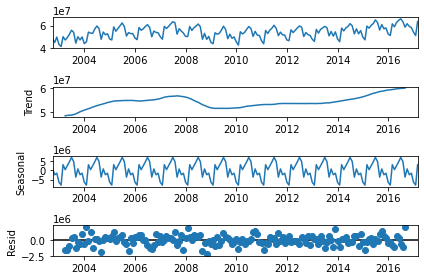

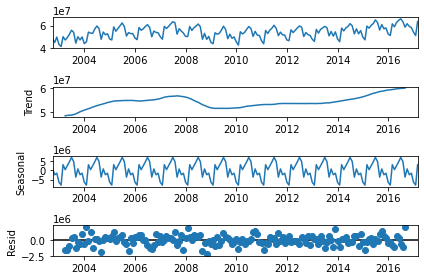

In [104]:
df_dom_decompose.plot()

In [105]:
df_dom.head()

,Passengers
Date,
2002-10-01,48054917
2002-11-01,44850246
2002-12-01,49684353
2003-01-01,43032450
2003-02-01,41166780


1. Shift by 1

In [109]:
df_dom_shift=df_dom-df_dom.shift()

In [110]:
df_dom_shift.head()

,Passengers
Date,
2002-10-01,NaN
2002-11-01,-3204671.0
2002-12-01,4834107.0
2003-01-01,-6651903.0
2003-02-01,-1865670.0


In [111]:
np.count_nonzero(df_dom_shift.isnull())  

1

In [113]:
df_dom_shift.dropna(inplace=True)

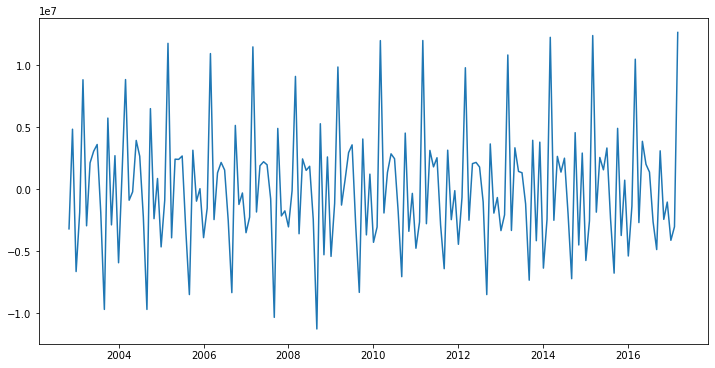

In [117]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_shift)

In [118]:
df_dom_shift_rol_mean=df_dom_shift.rolling(12).mean()
df_dom_shift_rol_std=df_dom_shift.rolling(12).std()

In [120]:
df_dom_shift_rol_mean.dropna(inplace=True)
df_dom_shift_rol_std.dropna(inplace=True)

Text(0, 0.5, 'Passengers')

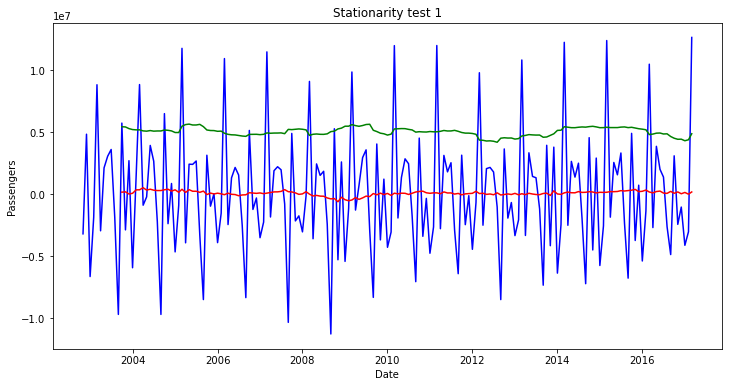

In [121]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_shift,color='blue',label='Original')
plt.plot(df_dom_shift_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_shift_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [122]:
adf_shift_result=adfuller(df_dom_shift)

In [123]:
print("p-value: ",adf_shift_result[1])
print("Test statistic: ",adf_shift_result[0])
print("Critical values: ",adf_shift_result[4])

p-value:  0.18968304723405754
Test statistic:  -2.2468495247357154
Critical values:  {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


2. Seasonal shift

In [124]:
df_dom_seas_shift=df_dom-df_dom.shift(12)

In [125]:
df_dom_seas_shift.head(15)

,Passengers
Date,
2002-10-01,NaN
2002-11-01,NaN
2002-12-01,NaN
2003-01-01,NaN
2003-02-01,NaN
2003-03-01,NaN
2003-04-01,NaN
2003-05-01,NaN
2003-06-01,NaN


In [126]:
df_dom_seas_shift.dropna(inplace=True)

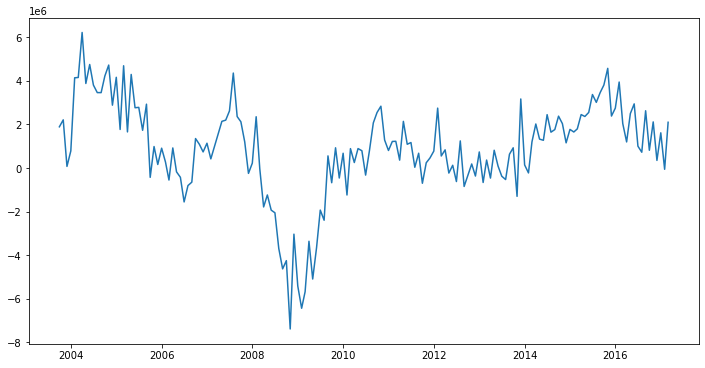

In [127]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_seas_shift)

In [128]:
df_dom_seas_shift_rol_mean=df_dom_seas_shift.rolling(12).mean()
df_dom_seas_shift_rol_std=df_dom_seas_shift.rolling(12).std()

In [129]:
df_dom_seas_shift_rol_mean.dropna(inplace=True)
df_dom_seas_shift_rol_std.dropna(inplace=True)

Text(0, 0.5, 'Passengers')

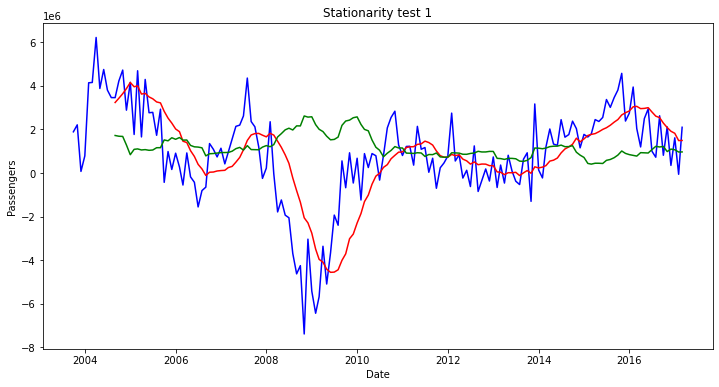

In [130]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_seas_shift,color='blue',label='Original')
plt.plot(df_dom_seas_shift_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_seas_shift_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [131]:
adf_seas_shift_result=adfuller(df_dom_seas_shift)

In [132]:
print("p-value: ",adf_seas_shift_result[1])
print("Test statistic: ",adf_seas_shift_result[0])
print("Critical values: ",adf_seas_shift_result[4])

p-value:  0.018513341357712636
Test statistic:  -3.226273742946385
Critical values:  {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}


Tried 2 approcahes for  transformation- shift(1) and shift(12). The latter's rolling mean graph does not look remotely stationary but ADF tests cleared. Need to understand why. Also, look at other approaches to transform based on 
https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima/notebook
(log, exp. decay etc.)